<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 2 - Parte 1  </H3>
<hr style="height:2px;border:none"/>

**Integrantes**  
* Rodrigo Hermosilla
* Eliana Providel
* Sebastián Rodriguez

<a id="primero"></a>
## 1. Clasificación de datos no-linealmente separables

> Algunos modelos de clasificación buscan implicita o explicitamente separar los datos linealmente, es decir ajustar un hiperplano que separe en 2 subespacios el espacio de las variables, separando ambas clases del _target_. Sin embargo en la mayoría de los casos reales esto resulta imposible. Esto no significa que no podamos ajustar modelos con estos datos o buscar transformaciones que nos permitan utilizarlos. 
    
![Alt Text](http://people.cs.uchicago.edu/~dinoj/manifold/swissroll.gif) 

[comment]: <> (Swiss Roll)

> En esta primera parte de la tarea crearemos manualmente un set de datos categóricos no linealmente separables. Este se conformará de puntos en $\mathbb{R}^2$, pertenecientes a una de dos categorías etiquetadas 0 o 1, los cuales se encuentran "anidados". Probaremos distintas aproximaciones lineales y no lineales y compararemos sus desempeños.


#### 1.a Creando los datos
> La función `do_circles` retorna un conjunto de puntos etiquetados, donde la etiqueta 0 corresponde a puntos siguiendo una circunferencia (con un ruido asociado) y la etiqueta 1 a puntos dentro de esa circunferencia.

> Los parámetros de esta función tienen nombres intencionalmente no descriptivos. Analice la función y comente interpretación puede darle a cada uno de los parámetros con respecto a la influencia que tendrán en el set de datos obtenidos. Si lo estima conveniente, cambie el nombre de los parámetros a nombres más descriptivos.

In [1]:
from sklearn.utils import check_random_state
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns, numpy as np
import pandas as pd
sns.set();

plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

In [2]:
def do_circles(n_dots = 3000, ns = 0.15, scr = 0.3, cf = 1):
    generator = check_random_state(42)
    
    linspace = np.linspace(0, 2*cf*np.pi, n_dots) # devuelve datos uniformemente separados en un intervalo (ini, fin, cantidad)
    circle_x = np.cos(linspace) #calcula el coseno
    circle_y = np.sin(linspace) #calcula el seno

    inner_circle_x, outer_circle_x, inner_circle_y, outer_circle_y = train_test_split(circle_x, circle_y, test_size = 0.5) #Separamos los datos en circulos interno y externo
    inner_circle_x , inner_circle_y = inner_circle_x*scr , inner_circle_y*scr #Multiplicamos el parametro scr para separar los circulos gráficamente

    X = np.vstack(( #Juntamos los datos de outercircle y innercircle (luego de separarlos geometricamente)
        np.append(outer_circle_x, inner_circle_x), #Coordenada X
        np.append(outer_circle_y, inner_circle_y) #Coordenada Y
    )).T

    y = np.hstack([ #Asignamos etiquetas para X
        np.zeros(n_dots // 2, dtype=np.intp), #La primera mitad es la clase 0
        np.ones(n_dots // 2, dtype=np.intp) # La segunda mitad es la clase 1
    ])

    X += generator.normal(scale = ns, size = X.shape) #A X le sumamos un ruido gaussiano con desv estandar ns
    return train_test_split(X, y, test_size=0.3, random_state=42) #Split arrays or matrices into random train and test subsets

<img src="circulo.png"
     alt="Dataset"
     style="align:center; float: left; margin-left: 100px;" height="350" width="350"/>

- cf: Cuanto del circulo queremos hacer (este parametro opera sobre el espacio lineal en el cual queremos generar el circulo, y afecta directamente a que porcentaje de $2\cdot\pi$ utilizaremos para dibujar)

- scr: Es la separacion entre clases del conjunto de datos (para $scr \approx 1$, implican un mayor sobrelapamiento entre las clases. Para $scr>1$ tiene la clase 2 queda por fuera de la clase 1, y para $scr < 1$, ocurre lo contrario. 

- ns: Opera sobre la desviación estandar de un generador gaussiano, el cual se suma a los valores X. En ese sentido, nos genera un radio $ns$ maximo donde puede variar $X$ 

A continuación, utilizando la función *do_circles(...)* se creara el conjunto de datos de entrenamiento y prueba, luego se estudia la distribución de cada conjunto con el objetivo de conocer los datos. 

In [3]:
## Creando los conjuntos de datos
X_train, X_test, y_train, y_test = do_circles()

In [4]:
#revisando tamaño de datos obtenidos
print("X_train: ",X_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (2100, 2)
y_train:  (2100,)
X_test :  (900, 2)
y_test:  (900,)


In [5]:
#revisando los datos en sí.
print("X_train: ",X_train[:10])
print("y_train: ",y_train[:10])
print("X_test: ",X_test[:10])
print("y_test:  ",y_test[:10])

X_train:  [[-0.44312854  0.90489017]
 [ 0.44621043 -1.37110292]
 [ 0.1459179  -0.35845171]
 [ 0.23276061 -1.00790538]
 [-0.3577135  -0.01732682]
 [ 0.2182402   0.80357695]
 [ 0.78430619 -0.65002384]
 [-0.22328899 -0.51008078]
 [-0.73978702 -0.58134346]
 [ 0.946826   -0.37716665]]
y_train:  [0 0 1 0 1 0 0 0 0 0]
X_test:  [[ 0.52654066 -0.20485816]
 [-0.85958844  0.55552666]
 [ 0.24553813 -0.19823014]
 [-0.76203025  0.91812718]
 [ 0.50200797  0.25570253]
 [ 0.23996646  1.01637689]
 [-0.63723823 -0.98745176]
 [ 0.4180995   0.32944702]
 [-0.74931996 -0.48046349]
 [ 0.04624823 -0.46028996]]
y_test:   [1 0 1 0 1 0 0 1 0 1]


Como se observa, los datos X, estan compuestos por muestras que contienen su coordenada geometrica X e Y.

Mientrás que los datos y, estan compuestos por su asignación a la clase correspondiente (0 e 1)

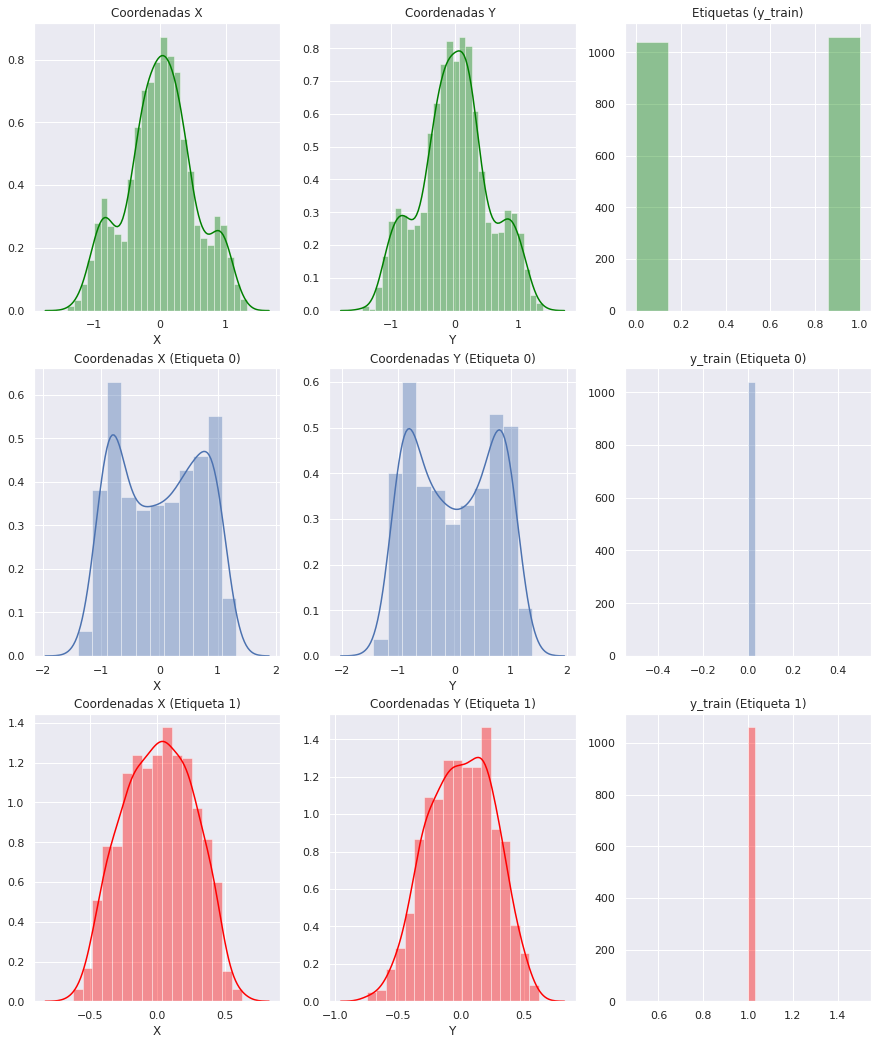

In [6]:
fig, ax = plt.subplots(3,3, figsize=(15,18))
df_circulo = pd.DataFrame({})

df_circulo['X'] = pd.Series(X_train[:,0])
df_circulo['Y'] = pd.Series(X_train[:,1])
df_circulo['label'] = pd.Series(y_train)

#sns.distplot(X_train[:,0], ax=ax[0][0], kde=False)
sns.distplot(df_circulo['X'], ax=ax[0][0], kde=True, color='green')
ax[0][0].set_title("Coordenadas X")
sns.distplot(df_circulo['Y'], ax=ax[0][1], kde=True, color='green')
ax[0][1].set_title("Coordenadas Y ")
sns.distplot(y_train, ax=ax[0][2], kde=False, color='green')
ax[0][2].set_title("Etiquetas (y_train)")

#sns.distplot(X_train[:,0], ax=ax[0][0], kde=False)
sns.distplot(df_circulo[df_circulo['label'] == 0]['X'], ax=ax[1][0], kde=True)
ax[1][0].set_title("Coordenadas X (Etiqueta 0)")
sns.distplot(df_circulo[df_circulo['label'] == 0]['Y'], ax=ax[1][1], kde=True)
ax[1][1].set_title("Coordenadas Y (Etiqueta 0)")
sns.distplot(y_train[y_train == 0], ax=ax[1][2], kde=False)
ax[1][2].set_title("y_train (Etiqueta 0)")

sns.distplot(df_circulo[df_circulo['label'] == 1]['X'], ax=ax[2][0], hist=True, color='red')
ax[2][0].set_title("Coordenadas X (Etiqueta 1)")
sns.distplot(df_circulo[df_circulo['label'] == 1]['Y'], ax=ax[2][1], hist=True, color='red')
ax[2][1].set_title("Coordenadas Y (Etiqueta 1)")
sns.distplot(y_train[y_train == 1], ax=ax[2][2], kde=False, color='red')
ax[2][2].set_title("y_train (Etiqueta 1)")

plt.show()

In [7]:
df_circulo.describe()

,X,Y,label
count,2100.000000,2100.000000,2100.000000
mean,0.006046,-0.001739,0.505238
std,0.530772,0.544463,0.500092
min,-1.399993,-1.444662,0.000000
25%,-0.316816,-0.337114,0.000000
50%,0.019646,0.003097,1.000000
75%,0.334276,0.324529,1.000000
max,1.322767,1.378730,1.000000


Vemos que las coordenadas estan distribuidos de una forma quasi gaussiano, con perturbaciones cercanas a los valores de las coordenadas 1 y -1. Descomponiendo el histograma total en histogramas por etiquetas podemos observar que estas perturbaciónes se deben a la etiqueta 0.

Esto debido a como es la separación de la etiqueta 0 de la 1: los datos de 1 estan centrados, mientras que los datos de la etiqueta 0 por como se generan, estan mas alejados del centro (generando estos peaks en el histograma). De forma mas visible se podra observar en el punto 1.b

#### 1.b Graficar los datos
> Cree una función que grafíque los datos, coloreando distintamente los puntos de cada clase. 
Utilice esta función para verificar gráficamente lo que propuso en la pregunta anterior.

In [8]:
import matplotlib.cm as cm
import itertools
from sklearn.linear_model import LogisticRegression

In [9]:
def plot_circles(title1, title2,_X_train, _y_train, _X_test, _y_test):
    # . . . 
    colors = itertools.cycle(["b", "r"])
    fig = plt.figure(figsize=(15,7))
    fig1 = fig.add_subplot(121)
    fig1.scatter(_X_train[_y_train==0][:,0], _X_train[_y_train==0][:,1],color=next(colors))
    fig1.scatter(_X_train[_y_train==1][:,0], _X_train[_y_train==1][:,1],color=next(colors))
    fig1.set_title(title1)
    fig1.set_xlabel("Coordenada X")
    fig1.set_ylabel("Coordenada Y")
    fig1.legend(["Clase 0", "Clase 1"])
    
    fig2 = fig.add_subplot(122)
    fig2.scatter(_X_test[_y_test==0][:,0], _X_test[_y_test==0][:,1],color=next(colors))
    fig2.scatter(_X_test[_y_test==1][:,0], _X_test[_y_test==1][:,1],color=next(colors))
    fig2.set_title(title2)
    fig2.set_xlabel("Coordenada X")
    #fig2.set_ylabel("Coordenada Y ")
    fig2.legend(["Clase 0", "Clase 1"])

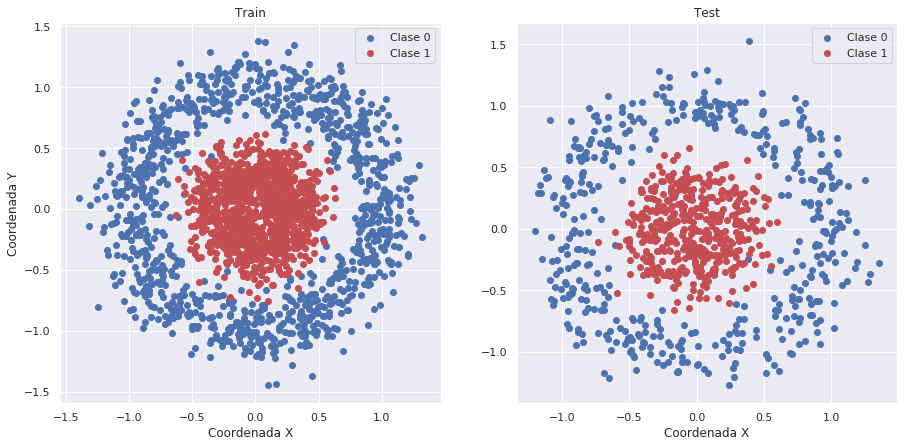

In [10]:
plot_circles('Train', 'Test', X_train, y_train, X_test, y_test)

Tal como se dijo anteriormente en 1.a, se puede observar la distribución de los histogramas para la categoria 0, como se generan los peaks en la distribución, debido a como se generan los circulos. En este caso, el círculo de la clase 0, esta alejado del centro a diferencia del círculo de la clase 1. 

#### 1.c Regresión Logística

> Realice una regresión logistica para a lo menos 5000 puntos generados con los siguientes parámetros:
* `do_circles(n_dots, 0.2, 0.3, 1)`
* `do_circles(n_dots, 0, 0.3, 1)`

> Grafique los datos que está ajustando y calcule el _score_ del regresor logístico en cada caso.
¿Qué valor entrega el _score_ del regresor logístico? ¿Le parece un buen desempeño para la tarea a realizar?

Utilizando el primer conjunto de parámetros: *do_circles(n_dots, 0.2, 0.3, 1)*

In [11]:
n_dots = 7000
X_train_c1, X_test_c1, y_train_c1, y_test_c1 = do_circles(n_dots, 0.2, 0.3, 1)
#revisando tamaño de datos obtenidos
print("X_train: ",X_train_c1.shape)
print("y_train: ", y_train_c1.shape)
print("X_test : ",X_test_c1.shape)
print("y_test : ",y_test_c1.shape)

X_train:  (4900, 2)
y_train:  (4900,)
X_test :  (2100, 2)
y_test :  (2100,)


In [12]:
log_reg_c1 = LogisticRegression(random_state=42)
log_reg_c1.fit(X_train_c1, y_train_c1)

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Utilizando el segundo conjunto de parámetros: *do_circles(n_dots, 0, 0.3, 1)*.

In [13]:
n_dots = 7000
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = do_circles(n_dots, 0, 0.3, 1)
#revisando tamaño de datos obtenidos
print("X_train: ",X_train_c2.shape)
print("y_train: ", y_train_c2.shape)
print("X_test : ",X_test_c2.shape)
print("y_test : ",y_test_c2.shape)

log_reg_c2 = LogisticRegression(random_state=42)
log_reg_c2.fit(X_train_c2, y_train_c2)


X_train:  (4900, 2)
y_train:  (4900,)
X_test :  (2100, 2)
y_test :  (2100,)


/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
print("Score Train {0:.5f}".format(log_reg_c1.score(X_train_c1, y_train_c1)))
print("Score Test  {0:.5f}".format(log_reg_c1.score(X_test_c1, y_test_c1)))

Score Train 0.65531
Score Test  0.62952


In [15]:

print("\nScore Train {0:.5f}".format(log_reg_c2.score(X_train_c2, y_train_c2)))
print("Score Test  {0:.5f}".format(log_reg_c2.score(X_test_c2, y_test_c2)))


Score Train 0.63245
Score Test  0.61333


Respecto a la primera pregunta *(¿Qué valor entrega el score del regresor logístico?)*: de los puntajes podemos observar que el segundo set de datos tiene una leve mejora en train y test. Lo que mide el score de la regresión logistica corresponde a la exactitud (Accuracy) y esta corresponde a la cantidad de aciertos obtenidos en el proceso de clasificación, divido por el total de muestras:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$, donde: 


$TP:$ Verdaderos Positivos

$TN:$ Verdaderos Negativos

$FP:$ Falsos Positivos

$FN:$ Falsos Negativos

Respondiendo a la segunda pregunta *(¿Le parece un buen desempeño para la tarea a realizar?)*: esto obviamente indica una facilidad en la posible separación de los datos de forma lineal, el problema es que como la topología de nuestros datos corresponden a circulos, puede que el clasificador este clasificando muy bien una categoría, y clasificando erroneamente la mayoría de la otra categoría. Mas metricas tienen que analizarse como el $f1$ o en su defecto precisión y recall.

In [16]:
from sklearn import metrics
print(metrics.classification_report(log_reg_c1.predict(X_test_c1), y_test_c1))

              precision    recall  f1-score   support

           0       0.34      0.85      0.48       427
           1       0.94      0.57      0.71      1673

   micro avg       0.63      0.63      0.63      2100
   macro avg       0.64      0.71      0.60      2100
weighted avg       0.82      0.63      0.66      2100



In [17]:
print(metrics.classification_report(log_reg_c2.predict(X_test_c2), y_test_c2))


              precision    recall  f1-score   support

           0       0.25      1.00      0.40       269
           1       1.00      0.56      0.72      1831

   micro avg       0.61      0.61      0.61      2100
   macro avg       0.62      0.78      0.56      2100
weighted avg       0.90      0.61      0.67      2100



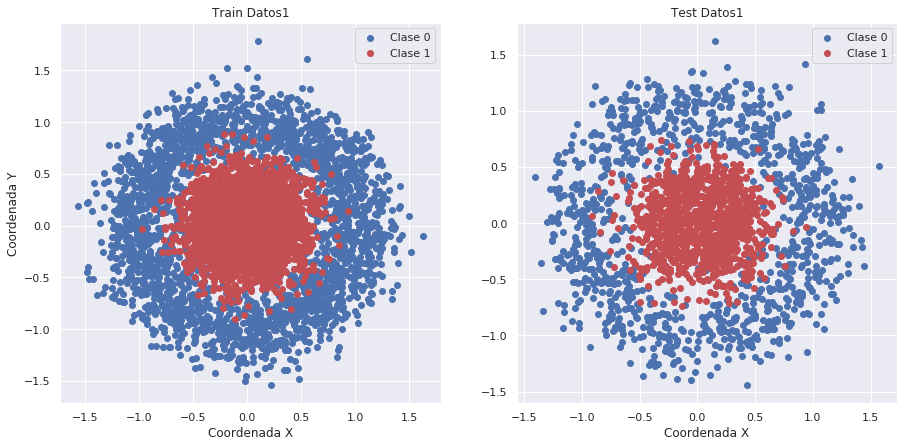

In [18]:
plot_circles('Train Datos1', 'Test Datos1', X_train_c1, y_train_c1, X_test_c1, y_test_c1)

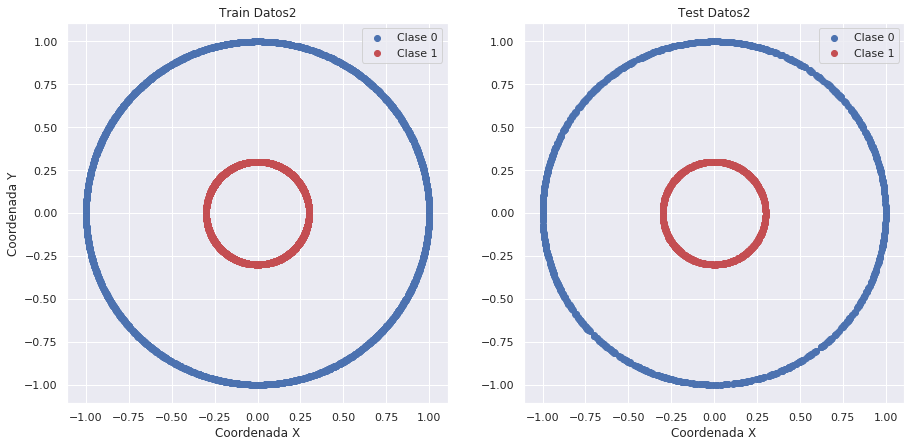

In [19]:
plot_circles('Train Datos2', 'Test Datos2', X_train_c2, y_train_c2, X_test_c2, y_test_c2)

#### 1.d Graficos
>Para entender mejor lo que está ocurriendo con el clasificador en cada uno de los casos, grafícaremos los datos clasificados y la frontera de desición ajustada por el modelo. Para esto complete la función siguiente y luego utilicela para ambos modelos y conjuntos de datos ajustados en la pregunta anterior. 

>¿Qué puede concluir luego de estas visualizaciones? ¿Es posible mejorar el desempeño de algun clasificador lineal sin hacer una transformación de los datos? ¿Qué ocurre con el clasificador si disminuimos el ruido, mejora realmente su desempeño? 

In [20]:
def plot_classifier(clf, _X_train, _y_train, _X_test, _y_test,title, tr_tst='test', axis = ax):
    if tr_tst == 'train':
        axis.scatter(_X_train[_y_train==0][:,0], _X_train[_y_train==0][:,1])
        axis.scatter(_X_train[_y_train==1][:,0], _X_train[_y_train==1][:,1])
    elif tr_tst == 'test':
        axis.scatter(_X_test[_y_test==0][:,0], _X_test[_y_test==0][:,1])
        axis.scatter(_X_test[_y_test==1][:,0], _X_test[_y_test==1][:,1])
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j] # grid for cassifier
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # what the classifier predicts over the space
    Z = Z.reshape(XX.shape) # for consistency
    Zplot = Z > 0.5 # to separate both classes
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn',alpha=0.1)
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    axis.set_title(title)
    axis.legend(['Clase 0', 'Clase 1'])

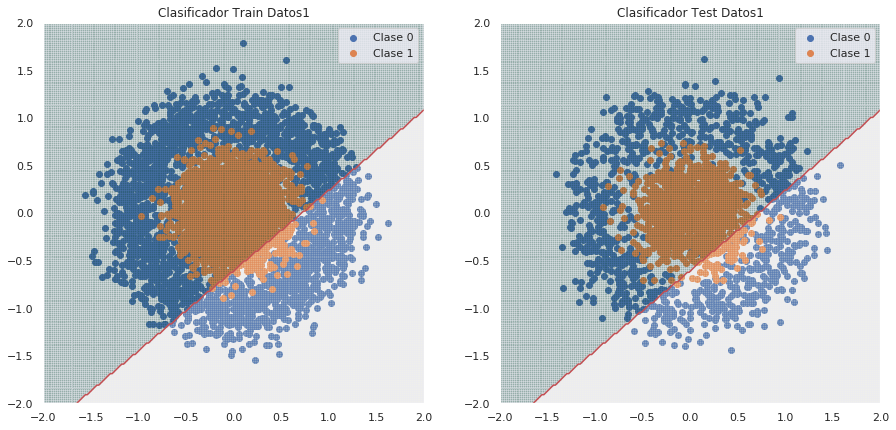

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_classifier(log_reg_c1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Clasificador Train Datos1',tr_tst='train',axis = ax[0])
plot_classifier(log_reg_c1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Clasificador Test Datos1',tr_tst='test',axis = ax[1])
plt.show()

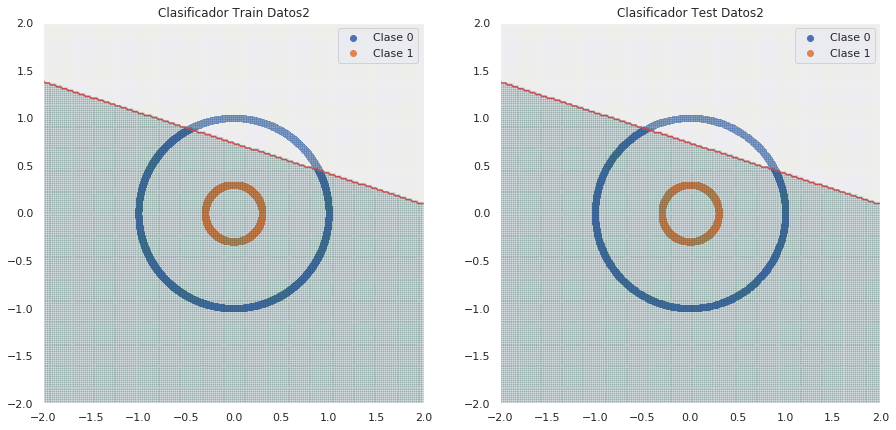

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_classifier(log_reg_c2, X_train_c2, y_train_c2, X_test_c2, y_test_c2,'Clasificador Train Datos2',tr_tst='train',axis = ax[0])
plot_classifier(log_reg_c2, X_train_c2, y_train_c2, X_test_c2, y_test_c2,'Clasificador Test Datos2',tr_tst='test', axis = ax[1])
plt.show()


* ¿Qué puede concluir luego de estas visualizaciones?
    - La sospecha anterior detallada al momento de hacer la interpretación del ´score´, fue confirmada. Una gran parte de los datos de una categoría son clasificados correctamente (clase 1), mientras que la clase 0 son mayoritariamente clasficados erroneamente. 
* ¿Es posible mejorar el desempeño de algun clasificador lineal sin hacer una transformación de los datos?
    - Mejorar el ´score´ no es posible sin hacer una transformación. Esto es debido a que los datos no son linealmente separables. Sin embargo existen otras métricas que ponderan no solo los aciertos, sino tambien los falsos positivos (precisión), entonces podriamos analizar el aumento del rendimiento dada esta métrica.  
    
* ¿Qué ocurre con el clasificador si disminuimos el ruido, mejora realmente su desempeño?
    - Si, mejora su desempeño 

Respecto a la segunda pregunta, modificando el parametro cf podemos obtener un problema linealmente separable: 


/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1019

   micro avg       1.00      1.00      1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



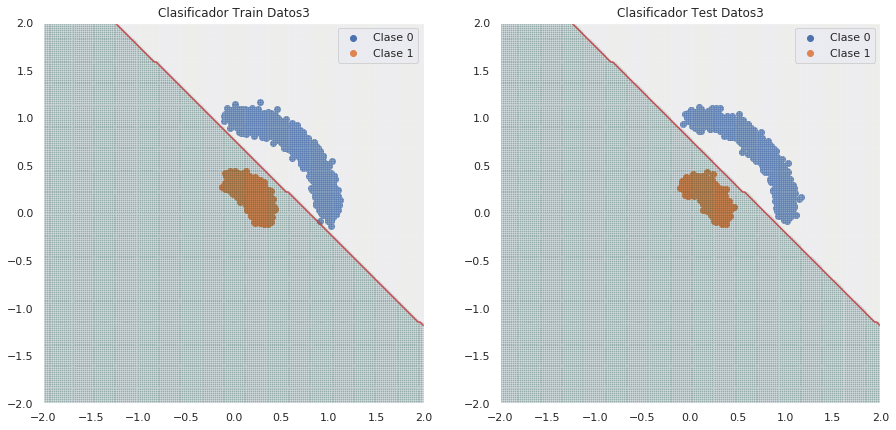

In [23]:
n_dots = 7000
X_train_c3, X_test_c3, y_train_c3, y_test_c3 = do_circles(n_dots, 0.05, 0.3, 0.25)

log_reg_c3 = LogisticRegression(random_state=42)
log_reg_c3.fit(X_train_c3, y_train_c3)

print(metrics.classification_report(log_reg_c3.predict(X_test_c3), y_test_c3))
fig, ax = plt.subplots(1,2, figsize=(15,7))

plot_classifier(log_reg_c3, X_train_c3, y_train_c3, X_test_c3, y_test_c3,'Clasificador Train Datos3',tr_tst='train',axis = ax[0])
plot_classifier(log_reg_c3, X_train_c3, y_train_c3, X_test_c3, y_test_c3,'Clasificador Test Datos3',tr_tst='test', axis = ax[1])
plt.show()

>Para las siguientes preguntas nos enfocaremos **solo en la versión con ruido de los datos** pues en la práctica no existen datos sin ruido. Probaremos algunos métodos no lineales para ver que tanto logramos mejorar el desempeño en nuestros datos. 

#### 1.e SVM

>Entrene un clasificador SVM con los datos con ruido. ¿Qué forma tiene la frontera de desición esta vez? 

>¿Mejoran los resultados al alejarse de los metodos puramente lineales? Comente sobre el desempeño del modelo y su sensibilidad a los parámetros `C` y `gamma`, explorando como cambia la frontera de desición al variar estos parámetros. 

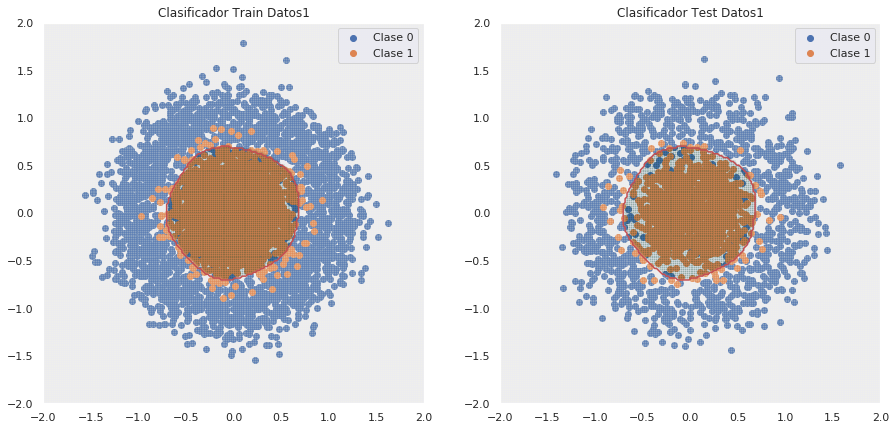

In [24]:
from sklearn.svm import SVC
SV_e1 = SVC(C=1, gamma=5)
SV_e1.fit(X_train_c1, y_train_c1)

SV_e2 = SVC(C=1, gamma=5)
SV_e2.fit(X_train_c2, y_train_c2)

fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_classifier(SV_e1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Clasificador Train Datos1',tr_tst='train',axis=ax[0])
plot_classifier(SV_e1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Clasificador Test Datos1',tr_tst='test',axis=ax[1])
plt.show()


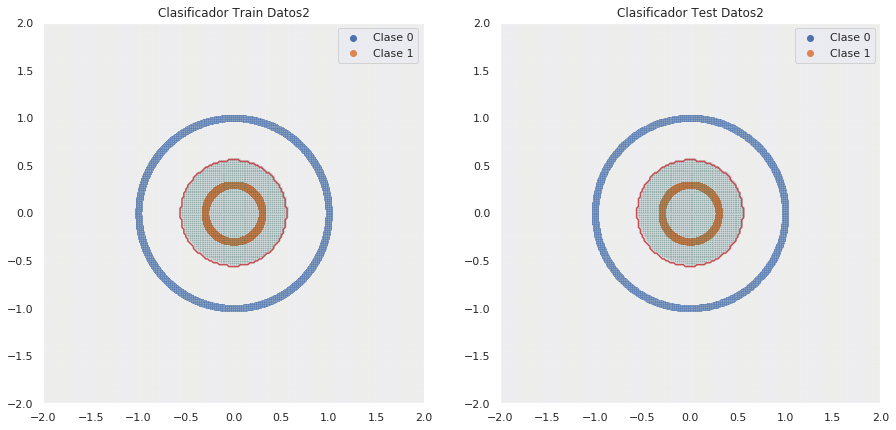

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_classifier(SV_e2, X_train_c2, y_train_c2, X_test_c2, y_test_c2,'Clasificador Train Datos2',tr_tst='train', axis=ax[0])
plot_classifier(SV_e2, X_train_c2, y_train_c2, X_test_c2, y_test_c2,'Clasificador Test Datos2',tr_tst='test', axis=ax[1])
plt.show()

** ¿Qué forma tiene la frontera de desición esta vez? **

La forma corresponde a un blob (o circulo) gaussiano debido a que ´SVC´ por defecto implementa un kernel gaussiano (Radial Basis Function: RBF) para realizar el *kernel trick*. Este se ve afectado por el parámetro ´gamma´  y por el parametro C donde:

Cuanto mayor sea el valor **gamma**, trata de ajustarse exactamente al conjunto de datos de entrenamiento.
Por su parte, **C** es el parámetro de penalización del término de error. Controla la compensación entre el límite de decisión suave y la clasificación correcta de los puntos de entrenamiento.

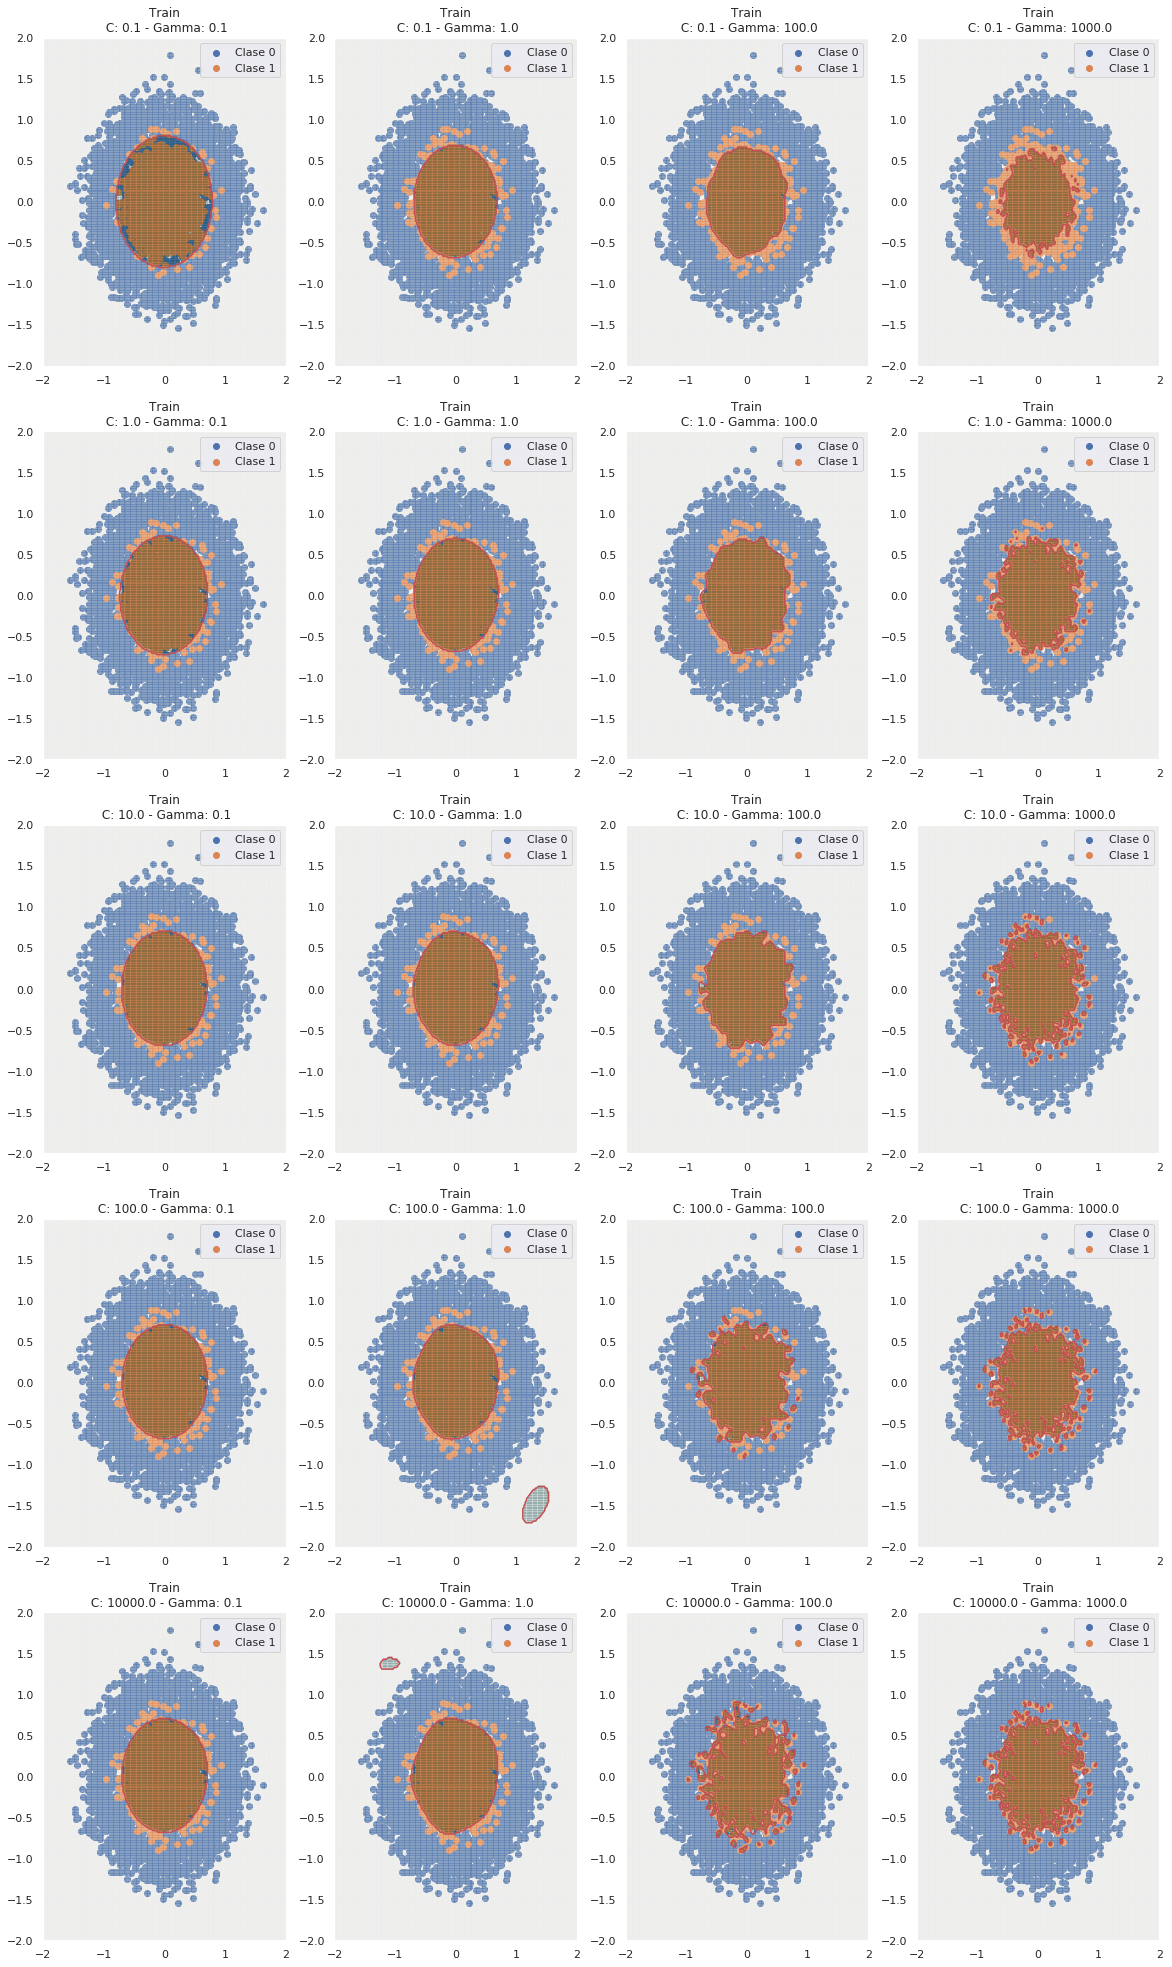

In [26]:
from sklearn.svm import SVC


Gamma_values   = np.array([0.1, 1, 100, 1000])
C_Values       = np.array([0.1, 1, 10, 100, 10000])
Gammas ,Cs  = pd.np.meshgrid(Gamma_values, C_Values)
grilla = list(zip(Gammas.reshape((-1,1)),Cs.reshape((-1,1))))
svm_res_train = []
fig, ax = plt.subplots(ncols=4,nrows=int(len(grilla)/4), figsize=(20,7*len(grilla)/4))
for i, subgrid in enumerate(grilla):
    C, gamma = subgrid[1], subgrid[0]
    SV_e1 = SVC(C=C[0], gamma=gamma[0])
    SV_e1.fit(X_train_c1, y_train_c1)
    svm_res_train.append({'C':C,'gamma':gamma,'score':SV_e1.score(X_train_c1, y_train_c1)})
    plot_classifier(SV_e1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Train\n '
                        +"C: "+ str(C[0])+" - Gamma: "+str(gamma[0]),tr_tst='train',axis=ax[int(i/4)][i%4])
_ = plt.show()

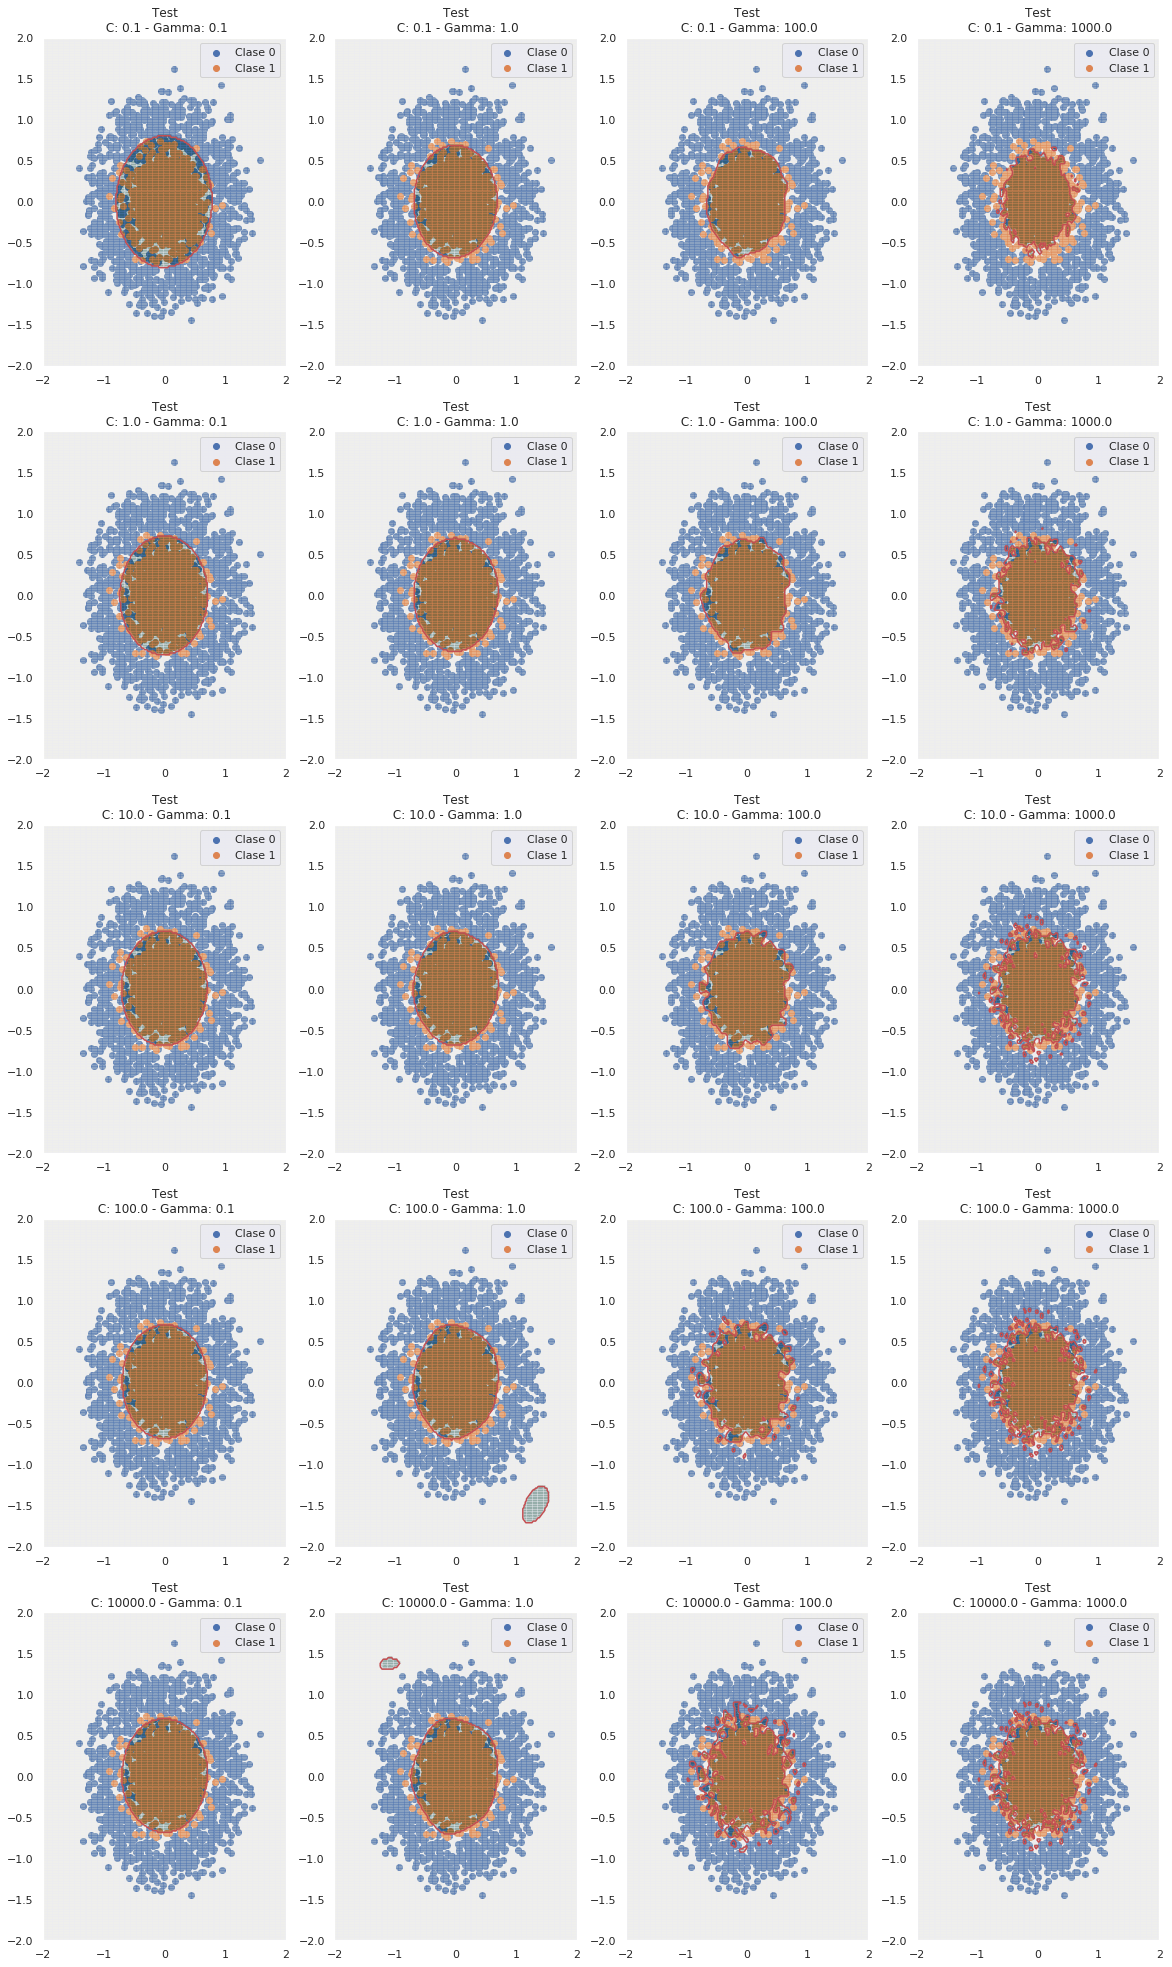

In [27]:
fig, ax = plt.subplots(ncols=4,nrows=int(len(grilla)/4), figsize=(20,7*len(grilla)/4))
svm_res_test = []

for i, subgrid in enumerate(grilla):
    C, gamma = subgrid[1], subgrid[0]
    SV_e1 = SVC(C=C[0], gamma=gamma[0])
    SV_e1.fit(X_train_c1, y_train_c1)
    svm_res_test.append({'C':C,'gamma':gamma,'score':SV_e1.score(X_test_c1, y_test_c1)})
    plot_classifier(SV_e1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Test\n '
                        +"C: "+ str(C[0])+" - Gamma: "+str(gamma[0]),tr_tst='test',axis=ax[int(i/4)][i%4])
_ = plt.show()

In [28]:
svm_res_train = pd.DataFrame(svm_res_train)
svm_res_test = pd.DataFrame(svm_res_test)

print(svm_res_train.sort_values(['score'],ascending=False))

            C     gamma     score
19  [10000.0]  [1000.0]  1.000000
15    [100.0]  [1000.0]  0.998980
18  [10000.0]   [100.0]  0.994898
11     [10.0]  [1000.0]  0.994694
7       [1.0]  [1000.0]  0.979796
14    [100.0]   [100.0]  0.974694
10     [10.0]   [100.0]  0.967347
6       [1.0]   [100.0]  0.964898
5       [1.0]     [1.0]  0.959796
12    [100.0]     [0.1]  0.959796
16  [10000.0]     [0.1]  0.959796
9      [10.0]     [1.0]  0.959592
1       [0.1]     [1.0]  0.958776
8      [10.0]     [0.1]  0.958571
13    [100.0]     [1.0]  0.958571
17  [10000.0]     [1.0]  0.957959
4       [1.0]     [0.1]  0.957143
2       [0.1]   [100.0]  0.956939
3       [0.1]  [1000.0]  0.955102
0       [0.1]     [0.1]  0.934490


In [29]:
print(svm_res_test.sort_values(['score'],ascending=False))

            C     gamma     score
12    [100.0]     [0.1]  0.955238
16  [10000.0]     [0.1]  0.954762
5       [1.0]     [1.0]  0.954286
8      [10.0]     [0.1]  0.953810
9      [10.0]     [1.0]  0.953333
4       [1.0]     [0.1]  0.951905
17  [10000.0]     [1.0]  0.951429
1       [0.1]     [1.0]  0.951429
13    [100.0]     [1.0]  0.951429
6       [1.0]   [100.0]  0.948095
2       [0.1]   [100.0]  0.947143
10     [10.0]   [100.0]  0.946190
14    [100.0]   [100.0]  0.937619
7       [1.0]  [1000.0]  0.935714
11     [10.0]  [1000.0]  0.930000
19  [10000.0]  [1000.0]  0.929048
15    [100.0]  [1000.0]  0.928095
0       [0.1]     [0.1]  0.926667
3       [0.1]  [1000.0]  0.925714
18  [10000.0]   [100.0]  0.916190


**¿Mejoran los resultados al alejarse de los metodos puramente lineales?**

Si, como se observan en los gráficos la frontera de decisión trata de ajustarse bordeando entre la clase 0 y 1.

**Comente sobre el desempeño del modelo y su sensibilidad a los parámetros `C` y `gamma`, explorando como cambia la frontera de desición al variar estos parámetros.** 

Si nos quedaramos solo con train, tendriamos que el modelo con parametros $C = 1000$ y $gamma = 1000$ corresponde al mejor modelo con una exactitud de un 100%. Sin embargo, podemos sospechar que sobreajustando, lo cual se confirma al comparar las gráficas para los modelos de train y testing con los mismos parametros. 

La frontera de decisión cambia su forma de una forma circular (utilizando gammas bajos) a una una forma mas ajustada a los datos. Por su parte el parametro C aumenta el radio de covertura en la clase 1. Esto es debido a como opera el parametro C modelando la distancia en la frontera de decision.  


#### 1.f KNN
>Pruebe ahora con otro método no lineal, _K nearest neighbors_ o KNN. Discuta sus resultados y la frontera de desición que encuentra el modelo. 

>Realice un _Cross Validation_ sobre el parámetro `n_neighbors` o `p` (o ambos usando un mallado) y comente si mejoran significativamente los resultados. Puede apoyarse de los códigos de la tarea 1 para realizar el _Cross Validation_.
¿Qué representan estos parámetros para el metodo?

Score Training KNN: 0.96531
Score Test KNN: 0.94333


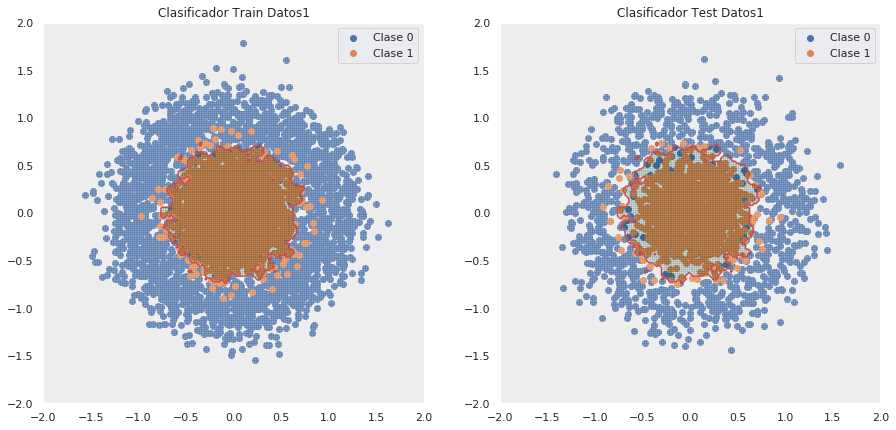

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN_1 = KNeighborsClassifier(n_neighbors=5, p=2)
KNN_1.fit(X_train_c1, y_train_c1)

#KNN_2 = KNeighborsClassifier(n_neighbors=5, p=2)
#KNN_2.fit(X_train_c2, y_train_c2)


fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(15,7))
print('Score Training KNN: {0:.5f}'.format(KNN_1.score(X_train_c1, y_train_c1)))
print('Score Test KNN: {0:.5f}'.format(KNN_1.score(X_test_c1, y_test_c1)))
plot_classifier(KNN_1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Clasificador Train Datos1',tr_tst='train', axis=ax[0])
plot_classifier(KNN_1, X_train_c1, y_train_c1, X_test_c1, y_test_c1,'Clasificador Test Datos1',tr_tst='test', axis=ax[1])

**Discuta sus resultados y la frontera de desición que encuentra el modelo.**

Como se observa en los gráficos, al utiliza KNN la frontera de decisión tiene una forma más oscilante que los visto con SVM, tratando de ajustarse a los datos y permitir la separación de las clases. Sin embargo, quedan datos sin clasificar correctamente tanto para train como para test. 

Esto ultimo ocurre debido al funcionamiento de KNN, donde los puntos se clasifican de acuerdo a la cercania de sus $k$ vecinos mas cercanos. 

Ahora hacemos validación cruzada, generando splits de validacion desde el train set

In [31]:
from sklearn.model_selection import KFold 
neighbors, ps = pd.np.meshgrid([n for n in range(2,11)],[i for i in range(1,11)])
results = []
r_best = []
for neighbor, p in zip(neighbors.reshape((-1,1)), ps.reshape((-1,1))):
    kf = KFold(n_splits=5,shuffle=True)
    folds_res = []
    for train_index, val_index in kf.split(X_train_c1):
        KNN_n = KNeighborsClassifier(n_neighbors=neighbor[0], p=p[0])
        KNN_n.fit(X_train_c1[train_index], y_train_c1[train_index])
        acc = KNN_n.score(X_train_c1[val_index],y_train_c1[val_index])
        folds_res.append(acc)
        results.append({'n_neighbors':neighbor[0],'p':p[0],'score':acc})
    r_best.append({'n_neighbors':neighbor[0],'p':p[0],'score_mean':np.mean(folds_res),'score_std':np.std(folds_res)})
results = pd.DataFrame(results)
r_best = pd.DataFrame(r_best)
results.head()

,n_neighbors,p,score
0,2,1,0.942857
1,2,1,0.921429
2,2,1,0.945918
3,2,1,0.936735
4,2,1,0.938776


In [32]:
knn_results = pd.crosstab(results['n_neighbors'],results['p'],values=results['score'],aggfunc=np.mean)

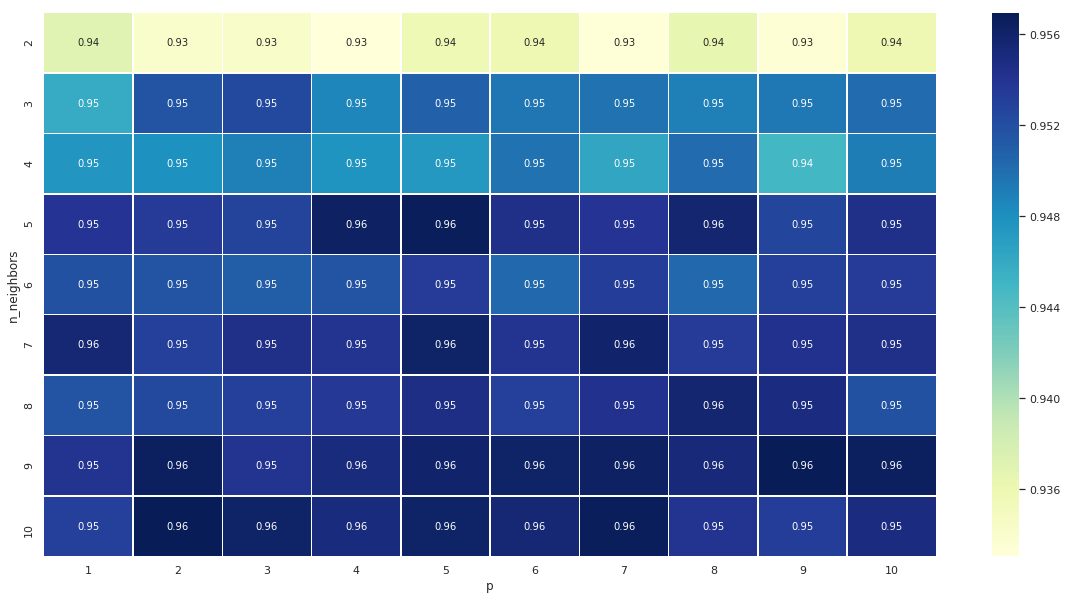

In [33]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(knn_results, cmap="YlGnBu",square=False,annot=True,linewidths=.5)
plt.show()

In [34]:
sort_knn_best = r_best.sort_values(['score_mean'],ascending=False).head()
best_knn_params = sort_knn_best.iloc[0,:]
best_knn_params

n_neighbors    9.000000
p              9.000000
score_mean     0.956939
score_std      0.005098
Name: 79, dtype: float64

**¿Qué representan estos parámetros para el metodo?**

El valor $n\_ neighbors$, representa el número de vecinos que considerara para ajustar el margen entre clases.

Y el valor $p$, indica que tipo de distancia se utilizará. Cuando $p$=2, se utiliza distancia Euclideana, cuando $p$=1 corresponde a distancia Manhattan, y para cualquier otro valor de $p$, equivale a la distancia Minkowski.




#### 1.g
>Del mejor modelo obtenido en el punto anterior, grafíque los datos de test coloreando de manera difente los puntos mal clasificados por su modelo. ¿Por qué el modelo no logra clasificar bien estos puntos? ¿Qué habría ocurrido si estuvieramos utilizando los datos sin ruido?

In [35]:
def plot_classifier2(clf, good_pred, bad_pred, title ="Hola Mundo :D", axis = ax):
    axis.scatter(good_pred[:,0], good_pred[:,1])
    axis.scatter(bad_pred[:,0], bad_pred[:,1])
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j] # grid for cassifier
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # what the classifier predicts over the space
    Z = Z.reshape(XX.shape) # for consistency
    Zplot = Z > 0.5 # to separate both classes
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn',alpha=0.1)
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    axis.set_title(title)
    axis.legend(['Bien Clasificados', 'Mal Clasificados'])

test score para el mejor KNN: 0.94762


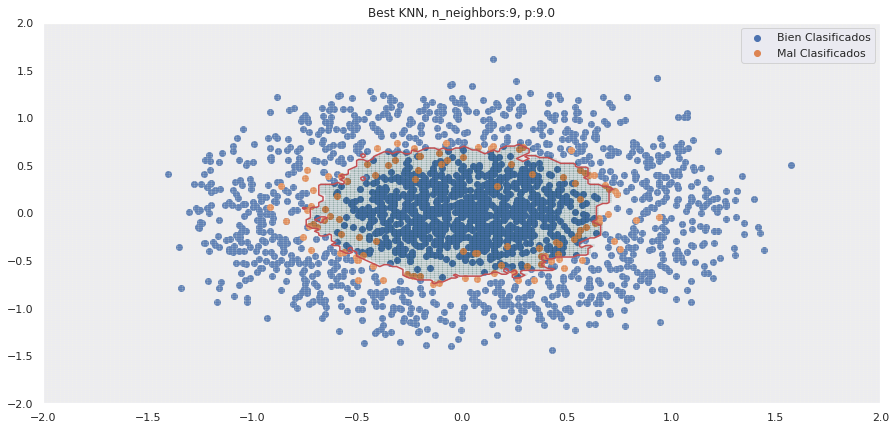

In [36]:
KNN_best = KNeighborsClassifier(n_neighbors=int(best_knn_params['n_neighbors']), p=best_knn_params['p'])
KNN_best.fit(X_train_c1, y_train_c1)
pred = KNN_best.predict(X_test_c1)
bad_predicted = X_test_c1[~np.equal(y_test_c1,pred)]
good_predicted = X_test_c1[np.equal(pred,y_test_c1)]
print('test score para el mejor KNN: {0:.5f}'.format(KNN_best.score(X_test_c1,y_test_c1)))
fig, ax = plt.subplots(1,1,figsize=(15,7))

plot_classifier2(KNN_best, good_predicted,bad_predicted,
                 "Best KNN, n_neighbors:{}, p:{}".format(int(best_knn_params['n_neighbors']),best_knn_params['p']),
                 axis =ax)


**¿Por qué el modelo no logra clasificar bien estos puntos?**

Como se describio anteriormente, al momento de entrenar la frontera de decisión se generó según la cercania de los $k$ vecinos de las muestras (considerando la clase de ellos). 

**¿Qué habría ocurrido si estuvieramos utilizando los datos sin ruido?**

Como los datos sin ruido son distantes entre clases, al analizar los $k$ vecinos mas cercanos, siempre corresponderian a la clase que corresponden. En este caso, los datos sin ruido presentan una distancia minima entre los datos de la misma clase, y se maximiza la distancia entre clases. 

A continuación se muestra con los mejores parametros de KNN con los con ruido (que perfectamente no pueden ser los mejores) para el problema de los datos sin ruido. Sin embargo, podemos observa que la frontera de decisión separa las clases ( No hay datos mal clasificados).

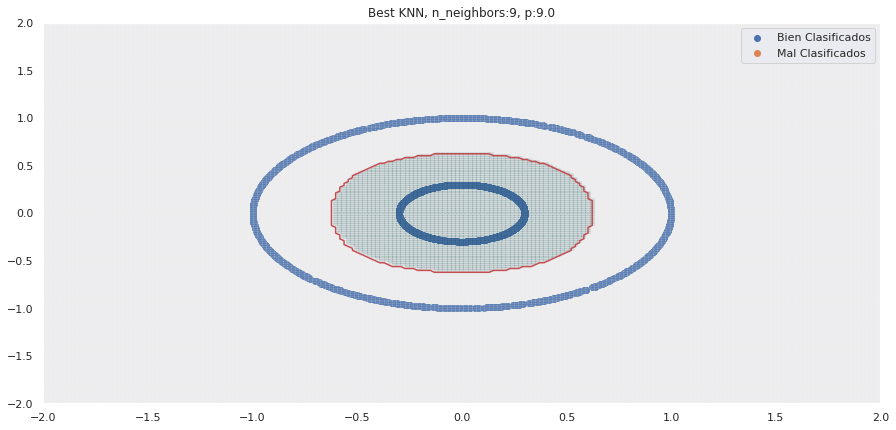

In [37]:
KNN_best = KNeighborsClassifier(n_neighbors=int(best_knn_params['n_neighbors']), p=best_knn_params['p'])
KNN_best.fit(X_train_c2, y_train_c2)
pred = KNN_best.predict(X_test_c2)
bad_predicted = X_test_c2[~np.equal(y_test_c2,pred)]
good_predicted = X_test_c2[np.equal(pred,y_test_c2)]

fig, ax = plt.subplots(1,1,figsize=(15,7))

plot_classifier2(KNN_best, good_predicted,bad_predicted,
                 "Best KNN, n_neighbors:{}, p:{}".format(int(best_knn_params['n_neighbors']),best_knn_params['p']),
                 axis =ax)


#### 1.h Metodo Kernel
>Utilizaremos Kernel Gaussiano para preprocesar los datos, pasando implícitamente por un espacio altamente dimensional (más especificamente por un _manifold_ de un espacio infinito dimensional), obteniendo una representación lo más linealmente separable posible. 

>Ajuste el kernel y transforme los datos. Grafique los puntos transformados y comente que realiza el modelo. Varie luego el valor de `gamma` para tratar de entender qué influencia tiene sobre la separabilidad de los puntos transformados. ¿Le parece un buen método para este problema? 

>Usando algún valor de `gamma` que le parezca adecuado, ajuste un modelo de regresión logística sobre los datos transformados. Mejora el desempeño del modelo respecto a la versión original? ¿Se logra aumentar la separabilidad lineal de los datos efectivamente? Apoyese de gráficos y métricas adecuados. 

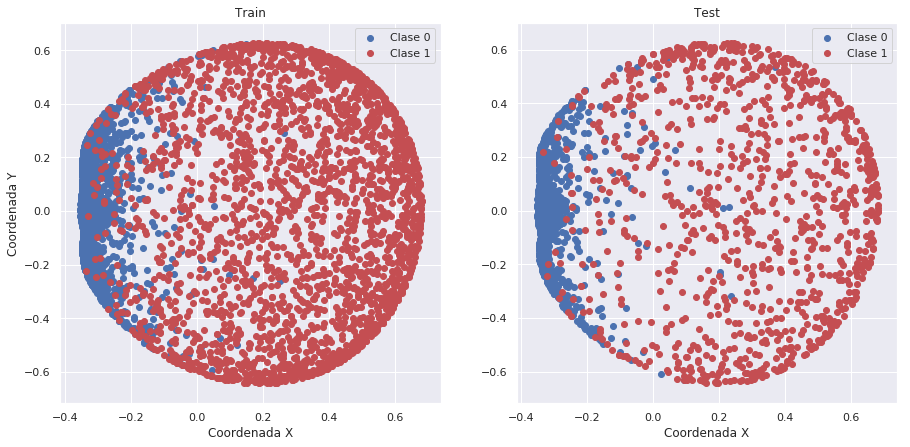

In [38]:
from sklearn.decomposition import KernelPCA
ker = KernelPCA(2,kernel='rbf',gamma=5)
ker.fit(X_train_c1)
X_ker_train = ker.transform(X_train_c1)
X_ker_test = ker.transform(X_test_c1)

plot_circles('Train', 'Test', X_ker_train, y_train_c1, X_ker_test, y_test_c1)


**Grafique los puntos transformados y comente que realiza el modelo.**

El modelo transforma nuestros datos que no son linealmente separables, a un problema que puede ser separado linealmente con una menor cantidad de errores de clasificación. 

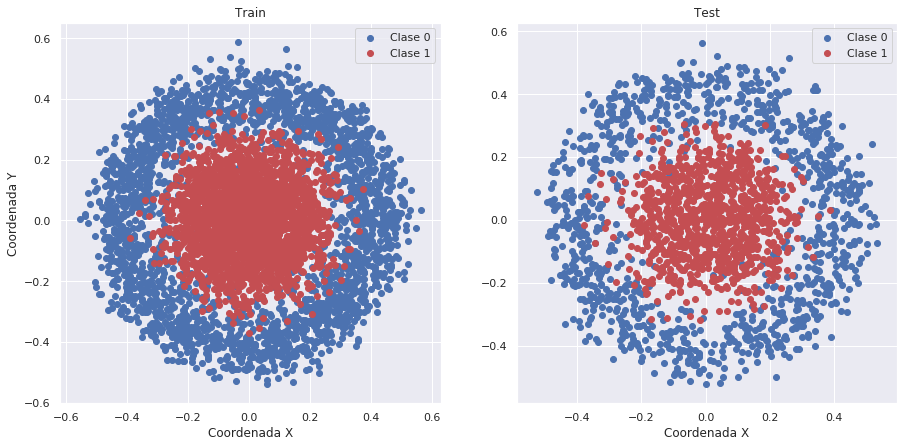

In [39]:
from sklearn.decomposition import KernelPCA
ker = KernelPCA(2,kernel='rbf',gamma=0.1)
ker.fit(X_train_c1)
X_ker_train = ker.transform(X_train_c1)
X_ker_test = ker.transform(X_test_c1)

plot_circles('Train', 'Test', X_ker_train, y_train_c1, X_ker_test, y_test_c1)


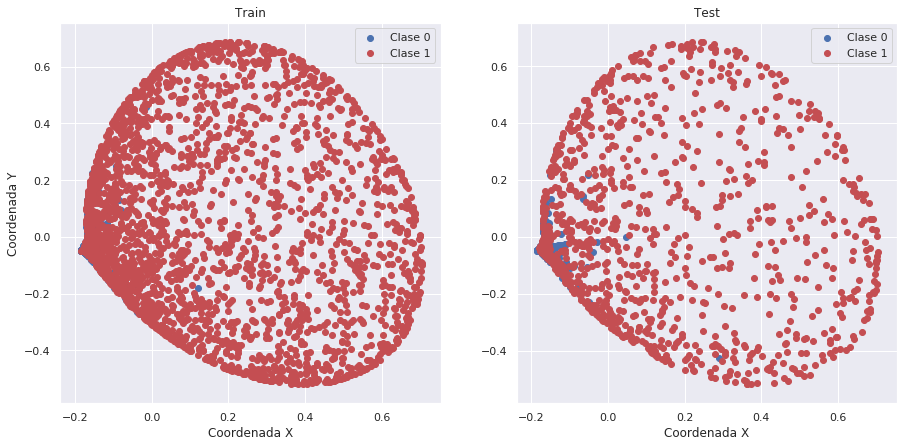

In [40]:
ker = KernelPCA(2,kernel='rbf',gamma=20)
ker.fit(X_train_c1)
X_ker_train = ker.transform(X_train_c1)
X_ker_test = ker.transform(X_test_c1)

plot_circles('Train', 'Test', X_ker_train, y_train_c1, X_ker_test, y_test_c1)

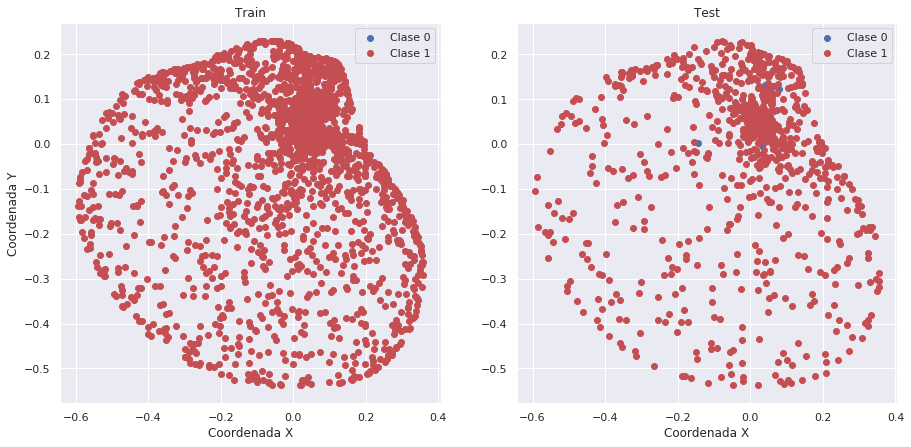

In [41]:
ker = KernelPCA(2,kernel='rbf',gamma=100)
ker.fit(X_train_c1)
X_ker_train = ker.transform(X_train_c1)
X_ker_test = ker.transform(X_test_c1)

plot_circles('Train', 'Test', X_ker_train, y_train_c1, X_ker_test, y_test_c1)

Respecto a las variaciones que existen en el modelo, podemos observar para valores bajos de gamma con un kernel rbf y pca, que no hay mayores cambios al set de datos original. Con un valor de gamma 5, tal como se menciono anteriormente, genera un nuevo espacio en donde los datos pueden ser separados linealmente.

Por otra parte, cuando tenemos gammas grandes perdemos la propiedad de separabilidad de los datos. Esto nos indica que si utilizamos este metodo para clasificación, le añadimos el hiperparametro gamma para evaluar una posible transformación a nuestros datos, obteniendo un error de entrenamiento bajo (pero queda evaluar como se comporta con el set de testing si es que este conjunto no es tan parecido a el set de training).


**¿Le parece un buen método para este problema?**

Si, debido a que permite que los datos sean linealmente separables, y uno esperaria que para el set de datos de testing esta transformación, genere una topología similar. 




/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score Train 0.95714
Score Test  0.95095
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1096
           1       0.94      0.96      0.95      1004

   micro avg       0.95      0.95      0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



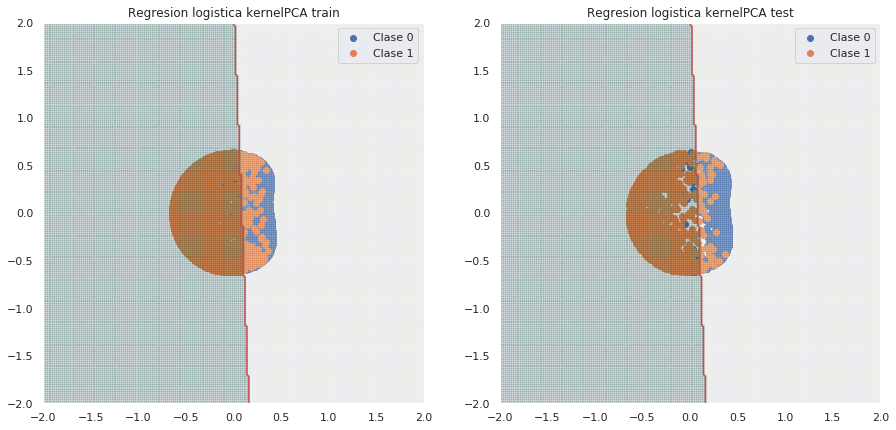

In [42]:
ker = KernelPCA(2,kernel='rbf',gamma=3,random_state=42)
ker.fit(X_train_c1)
X_ker_train = ker.transform(X_train_c1)
X_ker_test = ker.transform(X_test_c1)

log_kernel = LogisticRegression(random_state=42)
log_kernel.fit(X_ker_train,y_train_c1)

print("Score Train {0:.5f}".format(log_kernel.score(X_ker_train, y_train_c1)))
print("Score Test  {0:.5f}".format(log_kernel.score(X_ker_test, y_test_c1)))

print(metrics.classification_report(log_kernel.predict(X_ker_test), y_test_c1))
fig, ax = plt.subplots(1,2, figsize=(15,7))

plot_classifier(log_kernel, X_ker_train, y_train_c1, X_ker_test, y_test_c1,'Regresion logistica kernelPCA train',tr_tst='train',axis = ax[0])
plot_classifier(log_kernel, X_ker_train, y_train_c1, X_ker_test, y_test_c1,'Regresion logistica kernelPCA test',tr_tst='test', axis = ax[1])

**¿Mejora el desempeño del modelo respecto a la versión original?**

Sí: de una exactitud de $0.62048$, obtenemos un $0.95000$ de exactitud en el test set. 

**¿Se logra aumentar la separabilidad lineal de los datos efectivamente?**

Podemos ver tanto en la frontera de decisión del gráfico anterior, como en las métricas de precision y recall, que existe una mejora sustancial en separabilidad lineal de los datos. Aumentamos la precisión de la clase 0, y aumentamos el recall de la clase 1 a diferencia de la regresión logística original. 

#### 1.i Manualmente
>Como nosotros conocemos como se generaron los datos tenemos una ventaja sobre los modelos. Genere una transformación de los datos que estime conveniente para obtener datos linealmente separables. Puede aumentar o disminuir la dimensión a gusto, por ejemplo puede realizar algo del estilo $(x,y)\longrightarrow (x+y)$, ó $(x,y)\longrightarrow (x,y,x+y,x-y)$. Apoyese de las carácteristicas geométricas del conjunto de datos y justifique sus elecciónes con gráficos adecuados. 

>Luego entrene un regresor logístico sobre sus datos transformados y comente sobre la utilidad de conocer cómo se generaron los datos. Grafíque los datos transformados o alguna proyección de ellos junto con la frontera de desición y comente sobre lo que realiza su transformación.

In [53]:
def kernel_custom(X):
    #generator = check_random_state(42)
    x_new = X[:,0]
    y_new = X[:,1]
    
    #x_new[x_new > 1] = 1
    #x_new[x_new < -1] = -1
    
    #y_new[y_new > 1] = 1
    #y_new[y_new < -1] = -1
    
    x_new = np.arccos(np.abs(x_new) / np.max(np.abs(x_new))) * np.pi#**2
    y_new = np.arcsin(np.abs(y_new) / np.max(np.abs(y_new))) * np.pi#**2
    z_new = np.sqrt(2)*X[:,0]*X[:,1]
    new_X = np.vstack(( #Juntamos los datos de outercircle y innercircle (luego de separarlos geometricamente)
        x_new, #Coordenada X
        y_new, #Coordenada Y
        #[1]*len(x_new)#z_new 
    )).T
    #new_X  -= generator.normal(scale = 0.2, size = new_X.shape)
    return new_X

In [54]:
from mpl_toolkits.mplot3d import Axes3D
def plot_circles3d(title1, title2,_X_train, _y_train, _X_test, _y_test):
    # . . . 
    colors = itertools.cycle(["b", "r"])
    fig = plt.figure(figsize=(15,7))
    ax= Axes3D(fig)
    ax.scatter(_X_train[_y_train==0][:,0], _X_train[_y_train==0][:,1],_X_train[_y_train==0][:,2],color=next(colors))
    ax.scatter(_X_train[_y_train==1][:,0], _X_train[_y_train==1][:,1], _X_train[_y_train==1][:,2],color=next(colors))
    ax.set_title(title1)
    ax.set_xlabel("Coordenada X")
    ax.set_ylabel("Coordenada Y")
    ax.legend(["Clase 0", "Clase 1"])
    """
    fig2 = fig.add_subplot(122, projection='3d')
    fig2.scatter(_X_test[_y_test==0][:,0], _X_test[_y_test==0][:,1], _X_test[_y_test==0][:,2],color=next(colors))
    fig2.scatter(_X_test[_y_test==1][:,0], _X_test[_y_test==1][:,1], _X_test[_y_test==1][:,2],color=next(colors))
    fig2.set_title(title2)
    fig2.set_xlabel("Coordenada X")
    #fig2.set_ylabel("Coordenada Y ")
    fig2.legend(["Clase 0", "Clase 1"])"""

In [55]:
X_train_custom = kernel_custom(X_train_c1)
X_test_custom = kernel_custom(X_test_c1)

X_train_custom /= 10 #Escalamos para visualizar
X_test_custom /= 10 

plot_circles('Train', 'Test', X_train_custom, y_train_c1, X_test_custom, y_test_c1)

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score Train 0.94776
Score Test  0.94429
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1104
           1       0.93      0.95      0.94       996

   micro avg       0.94      0.94      0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



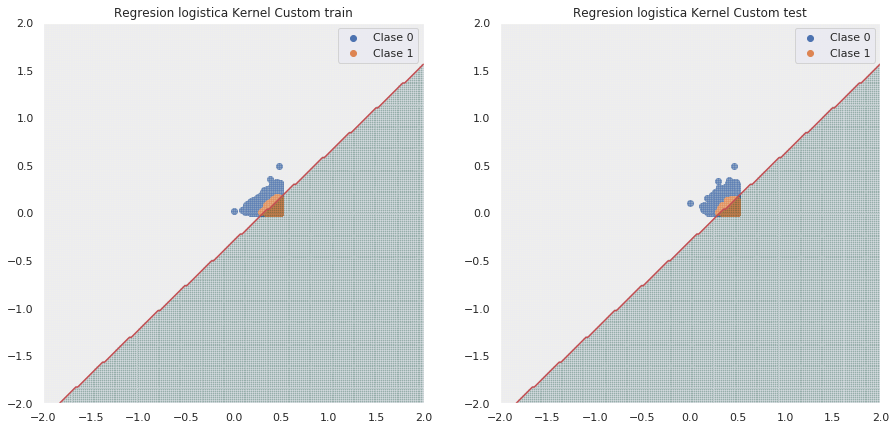

In [56]:
log_kernel = LogisticRegression(random_state=42)
log_kernel.fit(X_train_custom,y_train_c1)

print("Score Train {0:.5f}".format(log_kernel.score(X_train_custom, y_train_c1)))
print("Score Test  {0:.5f}".format(log_kernel.score(X_test_custom, y_test_c1)))

print(metrics.classification_report(log_kernel.predict(X_test_custom), y_test_c1))
fig, ax = plt.subplots(1,2, figsize=(15,7))

plot_classifier(log_kernel, X_train_custom, y_train_c1, X_test_custom, y_test_c1,'Regresion logistica Kernel Custom train',tr_tst='train',axis = ax[0])
plot_classifier(log_kernel, X_train_custom, y_train_c1, X_test_custom, y_test_c1,'Regresion logistica Kernel Custom test',tr_tst='test', axis = ax[1])

**¿Qué pasa si probamos con el set sin ruido?**

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score Train 1.00000
Score Test  1.00000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00      1019

   micro avg       1.00      1.00      1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



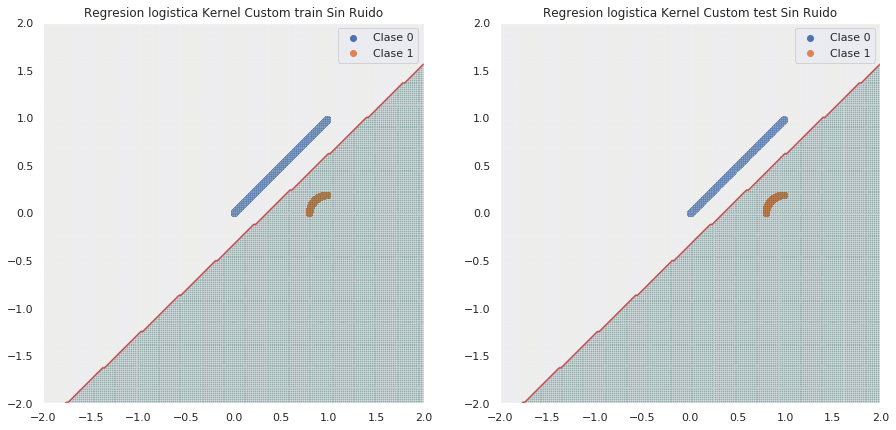

In [52]:
X_train_custom = kernel_custom(X_train_c2)
X_test_custom = kernel_custom(X_test_c2)

X_train_custom /= 10 #Escalamos para visualizar
X_test_custom /= 10 

log_kernel = LogisticRegression(random_state=42)
log_kernel.fit(X_train_custom,y_train_c1)

print("Score Train {0:.5f}".format(log_kernel.score(X_train_custom, y_train_c2)))
print("Score Test  {0:.5f}".format(log_kernel.score(X_test_custom, y_test_c2)))

print(metrics.classification_report(log_kernel.predict(X_test_custom), y_test_c2))
fig, ax = plt.subplots(1,2, figsize=(15,7))

plot_classifier(log_kernel, X_train_custom, y_train_c2, X_test_custom, y_test_c2,'Regresion logistica Kernel Custom train Sin Ruido',tr_tst='train',axis = ax[0])
plot_classifier(log_kernel, X_train_custom, y_train_c2, X_test_custom, y_test_c2,'Regresion logistica Kernel Custom test Sin Ruido',tr_tst='test', axis = ax[1])